('f1 =', 0.03613366483955975)
('f2 =', 0.08240297948316354)
('f3 =', 0.11252842210979504)


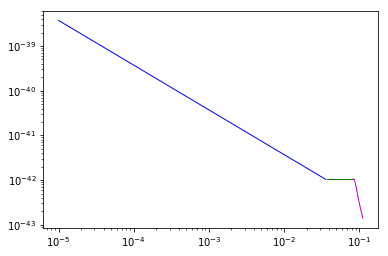

In [5]:
# -*- coding: utf-8 -*-


import numpy as np
import matplotlib.pyplot as plt

d = 2939.0                                                                       
n1 = 1.0*10**5                                                                      
n2 = 1.0*10**5                                                                     
f0 = 1.0*10**-5                                                                     
df = 1.0*10**-3                                                                     
C = 2.99792458e8
G = 6.67408e-11                                                                   
dL = d*3.0856*10**22
solar_mass = 2.0*10**30                                                    

m1=n1*solar_mass
m2=n2*solar_mass
M=m1+m2
eta=m1*m2/(M**2)                                                               
Mc=M*(eta**(3/5))                                                              
#dd=(m1-m2)/M
#chi1 = 0.6      # choose arbitrarily                                           # chi1=S1/m1^2 S1:spin angular momentum of BH 
#chi2 = 0.4      # choose arbitrarily                                           # chi2=S2/m2^2 S2:spin angular momentum of BH
#chi=((1+dd)*chi1+(1-dd)*chi2)/2                                                # a single spin parameter
chi=0.

yy1=[ 0.6437,  0.827,  -0.2706,  -0.05822, -3.935,   -7.092]
yy2=[ 0.1469, -0.1228, -0.02609, -0.0249,   0.1701,   2.325]
yy3=[-0.4098, -0.03523, 0.1008,   1.829,   -0.02017, -2.87 ]
yy4=[-0.1331, -0.08172, 0.1451,  -0.2714,   0.1279,   4.922]
miu1=yy1[0]*eta+yy1[1]*eta*chi+yy1[2]*eta*(chi)**2+yy1[3]*(eta)**2 \
     +yy1[4]*(eta)**2*chi+yy1[5]*(eta)**3
miu2=yy2[0]*eta+yy2[1]*eta*chi+yy2[2]*eta*(chi)**2+yy2[3]*(eta)**2 \
     +yy2[4]*(eta)**2*chi+yy2[5]*(eta)**3      
miu3=yy3[0]*eta+yy3[1]*eta*chi+yy3[2]*eta*(chi)**2+yy3[3]*(eta)**2 \
     +yy3[4]*(eta)**2*chi+yy3[5]*(eta)**3
miu4=yy4[0]*eta+yy4[1]*eta*chi+yy4[2]*eta*(chi)**2+yy4[3]*(eta)**2 \
     +yy4[4]*(eta)**2*chi+yy4[5]*(eta)**3                              

f10=1-4.455*(1-chi)**(0.217)+3.521*(1-chi)**(0.26)
f20=(1-0.63*(1-chi)**(0.3))/2
sigma0=(1-0.63*(1-chi)**(0.3))*((1-chi)**(0.45))/4
f30=0.3236+0.04894*chi+0.01346*chi**2

f1=(C**3/G)*(miu1+f10)/(np.pi*M)                                               # 加上量纲c^3/G
f2=(C**3/G)*(miu2+f20)/(np.pi*M)
sigma=(C**3/G)*(miu3+sigma0)/(np.pi*M)
f3=(C**3/G)*(miu4+f30)/(np.pi*M)

pm=(np.pi*M)/(C**3/G)
alph2=451*eta/168-(323/224)
a2=alph2*(pm**(2/3))                                                           # 加上量纲
alph3=(27/8-11*eta/6)*chi
a3=alph3*pm
b1=(1.4547*chi-1.8897)*(pm**(1/3))
b2=(1.6557-1.8153*chi)*(pm**(2/3))

freq1=np.arange(f0,round(f1,5),df)
freq2=np.arange((round(f1,5)+df),round(f2,5),df)
freq3=np.arange((round(f2,5)+df),round(f3,5),df)

Const=C**(-3/2)*G**(5/6)*(M**(5/6)*(f1**(-7/6))/(dL*np.pi**(2/3)))*  \
      np.sqrt(5*eta/24)
#factor C**(-3/2)*G**(5/6) being added since C=G=1 at 0710.2335

A1=Const*(freq1/(max(freq1)))**(-7/6)*(1+a2*freq1**(2/3)+a3*freq1)
c12=(1+a2*(min(freq2))**(2/3)+a3*(min(freq2)))/(1+b1*(min(freq2))**(1/3) \
    +b2*(min(freq2))**(2/3))
A2=c12*Const*(freq2/min(freq2))**(-2/3)*(1+b1*freq2**(1/3)+b2*freq2**(2/3))
c23=(c12*(min(freq3)/min(freq2))**(-2/3)*(1+b1*min(freq3)**(1/3)    \
    +b2*min(freq3)**(2/3)))/(2/(np.pi*sigma))
A3=c23*Const*(sigma/(2*np.pi))/((freq3-min(freq3))**2+(sigma/2)**2)

freq=[freq1,freq2,freq3]
Af=[A1,A2,A3]

hc1 = 2*freq1*A1 
hc2 = 2*freq2*A2
hc3 = 2*freq3*A3

print("f1 =" ,f1)
print("f2 =" ,f2)
print("f3 =" ,f3)
plt.loglog(freq1, hc1,'b',linewidth=1) 
plt.loglog(freq2, hc2,'g',linewidth=1)
plt.loglog(freq3, hc3,'m',linewidth=1)
#plt.xlim(1e-4, 1e1)
plt.show()